# The market of public catering restaurants in Moscow

<b> Project: </b>
- Opening of a cafe in Moscow with robot waiters.

<b> Data provided: </b>
- Open data on public catering restaurants in Moscow.

<b> Task: </b>
- Market research and preparation of recommendations on the type of institution, the number of seats, as well as the location area. Formation of forecasts regarding the development of the chain.

## Data Preparation and Exploration

In [494]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')
import seaborn as sns
import plotly.express as px
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

In [495]:
rest_data = pd.read_csv('/Users/vintera/Git/my_projects/dataset/project_08/rest_data.csv')
rest_data.sample(10)
rest_data.info()
rest_data.describe()

,id,object_name,chain,object_type,address,number
4921,82566,СТОЛОВАЯ КВАНТ,нет,столовая,"город Москва, город Зеленоград, проезд № 4801,...",60
8732,84148,KFC,да,предприятие быстрого обслуживания,"город Москва, Головинское шоссе, дом 5, корпус 1",70
14465,210159,Шератон,нет,ресторан,"город Москва, Международное шоссе, дом 28Б, ст...",92
13350,192985,Кафе «Кулинарная лавка братьев Караваевых»,да,магазин (отдел кулинарии),"город Москва, улица Тимура Фрунзе, дом 11, стр...",10
9832,170317,Донер & Тандыр,нет,предприятие быстрого обслуживания,"город Москва, Коломенский проезд, дом 8, корпус 5",0
4292,27017,РЕСТОРАН «КАЛИНКА»,нет,ресторан,"город Москва, проспект Мира, дом 150",127
14385,218060,Островок чай-кофе,нет,буфет,"город Москва, Осенний бульвар, дом 12",0
5143,83633,Вкус Грузии,нет,ресторан,"город Москва, улица Сущёвский Вал, дом 43",80
1046,24311,ШВАРЦ КАЙЗЕР,нет,кафе,"город Москва, Селезнёвская улица, дом 34, корп...",26
4678,22562,"Кафе, столовая, пицца, пончики",нет,кафе,"город Москва, Таганская улица, дом 32/1, строе...",30


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


In [496]:
rest_data.object_type.value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

### Summary
The libraries are loaded, the data are explored, we can start the preprocessing.

## Data processing and research

In [497]:
# All names of restaurants will be reduced to lowercase
rest_data['object_name'] = rest_data['object_name'].str.lower()

In [498]:
# Create a dictionary of variations of the names of large chain restaurants
name_dict = {'кафе «kfc»' : 'kfc', 'ресторан «kfc»' : 'kfc',
       'кафе «шоколадница»' : 'шоколадница',
       'mcdonalds' : 'макдоналдс', 'ресторан «макдоналдс»' : 'макдоналдс', 'кафе «макдоналдс»' : 'макдоналдс',
       'ресторан «тануки»' : 'тануки',
       'суши вок' : 'суши wok',
       'сабвей': 'subway', 'кафе «subway»' : 'subway',
       'пиццерия «папа джонс»' : 'папа джонс',
       'кафе «теремок»' : 'теремок'}
# Bring the names to a single sample using the dictionary
rest_data['object_name'] = rest_data['object_name'].replace(name_dict, regex=True) 

In [499]:
# Get rid of a small number of obvious duplicates
rest_data.drop_duplicates(
    subset=['object_name', 'object_type', 'address', 'number']).reset_index(drop=True)

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15276,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15277,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15278,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15279,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


### Summary
In the preprocessing, we partially brought the names of the restaurants to the general order. To compile a dictionary of names, the data was worked out manually, and therefore only large chains that were "in plain sight" were given to one name. Despite the different identifiers, 85 restaurants similar in name, type, address and number of places were removed.

## Exploratory Data Analysis

### Ratio of types of public catering facilities by quantity

In [500]:
# Group the data by type of restaurant, count their number and build a graph
type_cnt = rest_data.groupby(
    'object_type').agg({'id' : 'count'}).sort_values(by='id', ascending=False).reset_index()
type_cnt.columns = ['Тип объекта', 'Количество']
fig = px.bar(type_cnt, x='Тип объекта', y='Количество', title='Ratio of types of food items')
fig.show()

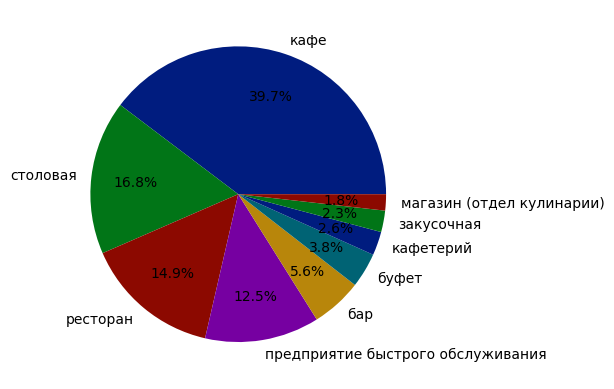

In [501]:
plt.pie(type_cnt['Количество'], 
        labels = type_cnt['Тип объекта'], 
        autopct='%.1f%%', 
        radius= 1, pctdistance = 0.7)
plt.show();

#### Summary
The number of cafes significantly prevails over other types of restaurants with an indicator of 6099 (39.7%). The number of canteens, restaurants and fast food restaurants is significantly lower than the number of cafes and is at the level of the average values of the graph - from 2587 to 1923. The least among the considered types of restaurants are shops with culinary departments - 273 (1.8%). It can be assumed that the cafe is most of all due to the universality of its concept, which in one way or another includes the concepts of other restaurants.

### The ratio of chain and non-chain restaurants by their number

In [502]:
# Group the data by type of restaurants and chain status, count their number and build a graph
chain_cnt = rest_data.groupby(
    ['chain','object_type']).agg(
    {'id' : 'count'}).sort_values(
    by='id', ascending=False).reset_index()
chain_cnt.columns = ['Сеть', 'Тип объекта', 'Количество']
fig = px.bar(chain_cnt, x="Тип объекта", y="Количество", color="Сеть", 
             title="The ratio of chain and non-chain restaurants")

#fig.update_layout(
#    xaxis = dict(
#        tickmode = 'array',
#        tickvals = chain_cnt['Тип объекта'],
#        ticktext = ["<br>".join(label.split()) for label in chain_cnt['Тип объекта']]
#    )
#)

fig.show()

#### Summary
On the graph, you can see that there are significantly fewer chain restaurants, and canteens, buffets and bars generally do not have chain restaurants at all. Cafes, restaurants and fast food businesses have the most chains of restaurants. It is worth looking at the relative values.

In [503]:
# Calculate the ratio of non-chained to chained restaurants
chain_ratio = chain_cnt.pivot_table(index='Тип объекта', columns='Сеть', values='Количество').reset_index()
chain_ratio['Соотношение'] = chain_ratio['да'] / chain_ratio['нет']
chain_ratio = chain_ratio.sort_values(by='Соотношение', ascending=False)
fig = px.bar(chain_ratio, x="Тип объекта", y="Соотношение",
             title="The ratio of chain and non-chain restaurants")
fig.show();

#### Summary
In this case, we see that the relative values were distributed differently. Fast food companies have the largest number of chain restaurants in relation to non-chain ones, when canteens, on the contrary, have only individual restaurants.

### Distribution of seats in online restaurants

In [504]:
# Filter the chain restaurants and build a schedule for the distribution of the number of seats
chain_object = rest_data.query('chain == "да"')
fig = px.histogram(chain_object, x="number")
fig.update_layout(
                  title="Distribution of the number of places in online restaurants",
                  xaxis_title="Number of seats",
                  yaxis_title="Number of restaurants")
fig.show();

#### Comment
The largest number of seats among the chain restaurants is in the range from 0 to 50.

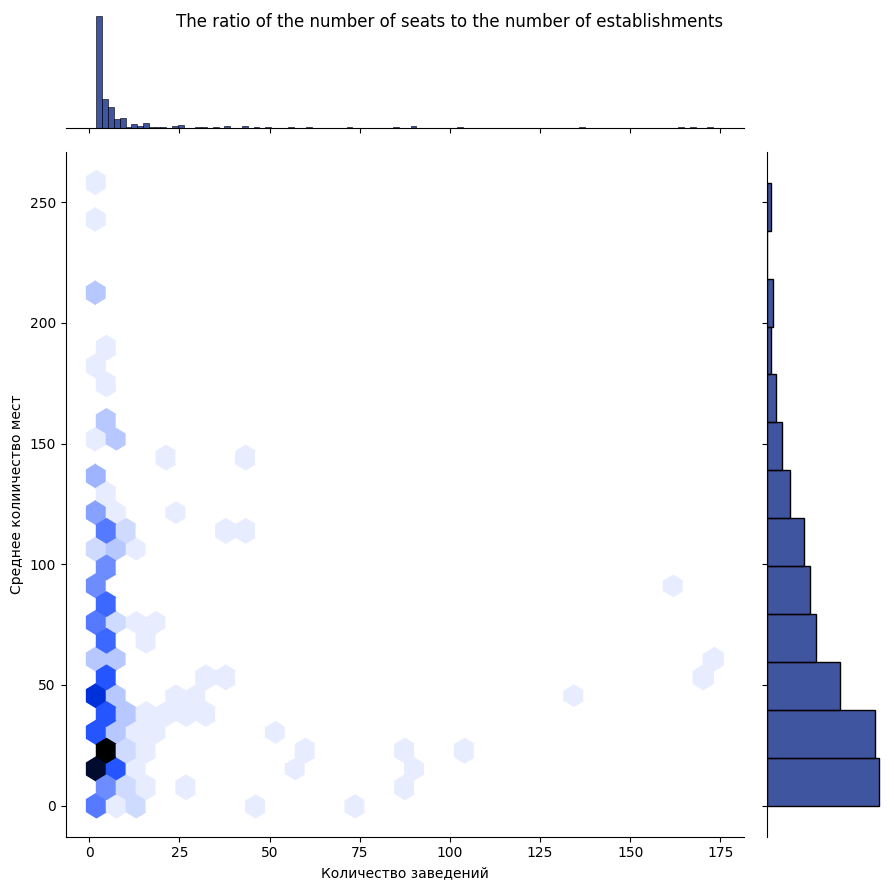

In [505]:
number_mean = chain_object.groupby('object_name').agg({'id':'count', 'number':'mean'})
number_mean['number'] = number_mean['number'].astype(int)
number_mean_without_1 = number_mean.query('id > 1')
number_mean_without_1.columns = ['Количество заведений', 'Среднее колиичество мест']
fig = sns.jointplot(x='Количество заведений', 
              y='Среднее колиичество мест', 
              data=number_mean_without_1, 
              height = 9, kind="hex")
fig.fig.suptitle('The ratio of the number of seats to the number of restaurants');

#### Summary
Chains with a large number of restaurants, as a rule, do not have a large number of seats. In chain restaurants with no more than 10 objects, there are restaurants with a large number of seats. However, most of the chain restaurants fall into the category with a small number of facilities and seats.

### Average number of seats by type of restaurants

In [506]:
# Group the data by type and calculate the average number of places for each, and then build a graph
mean_seats = rest_data.groupby('object_type')['number'].agg(mean_seats='mean').reset_index()
mean_seats.columns = ['Тип объекта', 'Количество мест']
mean_seats = mean_seats.sort_values(by='Количество мест', ascending=False)
fig = px.bar(mean_seats, x="Тип объекта", y="Количество мест",
             title="Average number of seats")
fig.show();

#### Summary
On average, canteens and restaurants have the largest number of seats - 130 and 97, respectively. For canteens, this is necessary, since you have to serve a large number of customers at the same time, and in restaurants this is due to the desire of customers to spend more time and in order not to offend any of the customers, there is a need to increase seating.
There are fewer seats in cafeterias, snack bars and culinary departments, where customers stay for a short time, and often take food with them.

### Top 10 streets by the number of public catering facilities

In [507]:
# Create a dictionary of names of addresses of objects
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия']
# Using regular expressions, we will remove all unnecessary and leave only street names in the street column
str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))
rest_data['street'] = rest_data['address'].str.extract(str_pat, flags=0)
rest_data.sample(5)

,id,object_name,chain,object_type,address,number,street
4404,23805,столовая школа 99,нет,столовая,"город Москва, Давыдковская улица, дом 14, корп...",170,Давыдковская улица
1716,135626,кофекрю,нет,кафе,"город Москва, улица Миклухо-Маклая, дом 33",15,улица Миклухо-Маклая
4586,75239,территория,да,ресторан,"город Москва, Рязанский проспект, дом 64",150,Рязанский проспект
14174,211445,planeta sushi il patio,нет,ресторан,"город Москва, проспект Мира, дом 211, корпус 2",96,проспект Мира
2805,134504,удон сан,нет,кафе,"город Москва, Селезнёвская улица, дом 28, стро...",11,Селезнёвская улица


In [508]:
import re

try:
    print(re.search(str_pat, "город Москва, проспект Мира").group(1))
except AttributeError as e:
    print("Not found :(Although here it is.", e)

try:
    print(re.search(str_pat, "город Москва, проспект Мира,").group(1))
except AttributeError as e:
    print("It will not be executed")


Not found :(Although here it is. 'NoneType' object has no attribute 'group'
проспект Мира


In [509]:
# Form a table of ten streets with the largest number of restaurants
top10_street = rest_data.groupby('street').agg(
    {'id' : 'count'}).sort_values(
    by='id',ascending=False).head(10).reset_index()
top10_street.columns = ['Улица', 'Количество заведений']
print('Top 10 streets with the largest number of restaurants')
top10_street

Top 10 streets with the largest number of establishments


,Улица,Количество заведений
0,проспект Мира,204
1,Профсоюзная улица,182
2,Ленинградский проспект,171
3,Пресненская набережная,167
4,Варшавское шоссе,164
5,Ленинский проспект,147
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


#### Comment
The bigger the street, the more restaurants there are, so our rating mainly includes highways and avenues. Most likely, this fact is uninformative, since the data is greatly distorted by the size of the streets.

### Top 10 districts by the number of public catering facilities

In [510]:
# Importing external data with street gradation by district
from io import BytesIO
import requests
spreadsheet_id = '19DwsyPT12C1C9p0F1SeMUkYV-6AEu6132Z73cocBlk8'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
area_data = pd.read_csv(BytesIO(r.content))
area_data

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [511]:
# Connect the tables by street name
rest_data = pd.merge(rest_data, area_data, left_on='street', right_on='streetname')

#### Comment
The merger significantly increased the size of the table, since one street can be located in several districts, and therefore the data on restaurants were duplicated in each of the districts through which the street passes.

In [512]:
# Group the data by district names
top10_area = rest_data.groupby('area').agg(
    {'id' : 'nunique'}).sort_values(
    by='id', ascending=False).head(10).reset_index()
top10_area.columns = ['Район', 'Количество заведений']
print('Top 10 districts with the largest number of restaurants')
top10_area[['Район']]

Top 10 districts with the largest number of establishments


,Район
0,Тверской район
1,Пресненский район
2,Басманный район
3,Даниловский район
4,Мещанский район
5,Донской район
6,Таганский район
7,Обручевский район
8,Район Замоскворечье
9,Район Гагаринский


In [513]:
# Create a list of streets with a large number of restaurants
top10_street_list = pd.Series(top10_street['Улица'])
# Filter the table by the resulting list
street_with_many_obj = rest_data.query('street in @top10_street_list')

print('Areas where the Top 10 streets pass through')
print('_________________________________________')
street_with_many_obj['area'].unique()

Areas where the Top 10 streets pass through
_________________________________________


array(['Район Чертаново Центральное', 'Район Чертаново Северное',
       'Район Чертаново Южное', 'Донской район',
       'Район Нагатино-Садовники', 'Нагорный район',
       'Район Северное Бутово', 'Район Южное Бутово',
       'Район Проспект Вернадского', 'Район Раменки',
       'Район Тропарево-Никулино', 'Район Гагаринский',
       'Ломоносовский район', 'Район Дорогомилово',
       'Район Фили-Давыдково', 'Район Москворечье-Сабурово',
       'Район Орехово-Борисово Южное', 'Район Орехово-Борисово Северное',
       'Район Аэропорт', 'Район Беговой', 'Хорошевский район',
       'Район Сокол', 'Обручевский район', 'Район Теплый Стан',
       'Район Якиманка', 'Алексеевский район', 'Ярославский Район',
       'Район Марьина роща', 'Останкинский район', 'Район Ростокино',
       'Район Свиблово', 'Мещанский район', 'Академический район',
       'Район Черемушки', 'Район Ясенево', 'Район Коньково',
       'Пресненский район'], dtype=object)

#### Summary
Despite the fact that the grouping by districts was carried out in a table containing a large number of duplicates, the copying of restaurants was carried out proportionally, which made it possible to make the Top 10 districts with the largest number of restaurants.

As one might assume, catering restaurants prefer to open closer to the center, which is why 6 districts of the rating are located in the central district. The remaining 4 districts are located close to each other, are far from the outskirts of the city, and their infrastructure includes a large number of educational institutions, dormitories for students, shopping centers and offices, which may also explain their inclusion in the top ten.

### Areas where there are streets with one food item

In [514]:
# Group the data by streets and districts, and then filter, leaving the streets with 1 institution
street_with_1_obj = rest_data.groupby(['street', 'area']).agg({'id' : 'count'}).query('id == 1').reset_index()
len(street_with_1_obj)

564

#### Comment
There are 564 streets in Moscow where one catering restaurant is located.

In [515]:
# Group the received data by districts
street_with_1_obj.columns = ['Улица', 'Район', 'Количество улиц']
street_with_1_obj_cnt = street_with_1_obj.groupby('Район').agg({'Количество улиц' : 'count'}).sort_values(
    by='Количество улиц', ascending=False).head(10).reset_index()
print('Areas where there are streets with one object')
street_with_1_obj_cnt

Areas where there are streets with one object


,Район,Количество улиц
0,Таганский район,27
1,Район Хамовники,26
2,Басманный район,25
3,Тверской район,20
4,Пресненский район,19
5,Район Марьина роща,18
6,Мещанский район,17
7,Район Арбат,17
8,Район Замоскворечье,14
9,Район Лефортово,12


#### Summary
Thus, CAO districts are again in the lead, now they are 7 in the ranking. The increased number of restaurants, coupled with the presence of a large number of small streets, alleys and all kinds of dead ends, allow the districts of the Central District to once again get into the "best" rating.

### Distribution of the number of seats for the Top 10 streets

In [516]:
# Filter the table by the resulting list
street_with_many_obj = rest_data.query('street in @top10_street_list')
# Get rid of duplicates that were obtained earlier due to merging tables
street_with_many_obj = street_with_many_obj.drop_duplicates(
    subset=['id']).reset_index(drop=True)

In [517]:
fig = px.histogram(street_with_many_obj, x="number")
fig.update_layout(
                  title="Distribution of the number of places for streets with a large number of restaurants",
                  xaxis_title="Number of seats",
                  yaxis_title="Number of restaurants",
                  margin=dict(l=0, r=0, t=80, b=0))
fig.show();

#### Summary
The largest number of restaurants has up to 10 seats, and the main part of the studied restaurants does not exceed 90 seats. Since the main part of the facilities is located in the central part of the city, where the rental of premises is categorically high, the owners of restaurants mostly have to squeeze the maximum out of a small area, hence a small number of seats. Also, the seating schedule is strongly "delayed" to a minimum by restaurants that do not have seats at all. Markets and grocery stores, food courts and takeaway restaurants build their business mainly on the production of food, and not on serving a large number of tables.

## General Conclusion and Recommendations

Summing up the results of the study, we can conclude about the factors that would have a positive impact on the business in the field of catering. Given that we did not have data on the profitability or attendance of certain institutions, we will build forecasts for the success of the business based on the velechin indicators, considering the most widespread as indicators of success. Thus , the following factors can be distinguished ::

   - The restaurant should be of the format of a cafe, restaurant or a fast-food company (we do not consider canteens due to the specifics of the location and service in these restaurants).
   - Opening a fast-service company, it is possible to consider the option of launching a chain of such restaurants. For cafes and restaurants, this factor is insignificant.
   - chains with a large number of restaurants are characterized by the presence of a small number of seats (from 0 to 50). When opening a single institution or a small chain, it is worth considering the option with the availability of more places (from 100).
   - Based on the specifics of restaurants, canteens and restaurants are characterized by the presence of a large number of seats (100 - 130). Buffets, bars and cafes are characterized by an average number of seats (about 50), the remaining restaurants on average have no more than 20 seats.
   - Most of the restaurants are located in the central part of the city. However, the competition factor will be much higher here. When making a recommendation on this issue, in order to maintain a balance between proximity to the historical center to attract tourists, as well as local residents and employees of the district, without immediately entering into a fight with large chains and hyped restaurants located in the center, it is preferable to choose densely populated areas adjacent to the center, with developed transport and office infrastructure.
   - Without fear of competition and high rents, if an institution opens in one of the central districts, it may be worth sticking to the format of local institutions and not increasing the number of seats more than 50.
   
As mentioned earlier, these recommendations are only the result of a study of a small amount of data. Unfortunately, we did not have the opportunity to investigate the behavior of customers of catering restaurants served by robots because of the innovativeness of this project. Answering the question whether robots will attract customers, we can assume - yes, and personal experience and assessment of the objective world suggest that delicious food and affordable prices will make customers loyal and the business profitable.